In [64]:
# Вариант 3. ФИО: Николаенко Роман Романович

# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [65]:
# Загрузка данных из файла
df = pd.read_excel('task1ice.xlsx')


Общие представления о типе данных, количестве строк и столбцах df:

In [66]:
df

,Unnamed: 0,City1Bef,City1Aft,City2Bef,City2Aft,City3Bef,City3Aft
0,0,136,126,114,121,136,127
1,1,114,138,128,137,136,105
2,2,115,124,131,122,113,134
3,3,109,150,139,127,126,126
4,4,129,117,123,117,127,114
...,...,...,...,...,...,...,...
195,195,104,138,142,120,127,127
196,196,126,111,134,143,105,123
197,197,124,139,137,125,127,115
198,198,128,130,122,139,132,137


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  200 non-null    int64
 1   City1Bef    200 non-null    int64
 2   City1Aft    200 non-null    int64
 3   City2Bef    200 non-null    int64
 4   City2Aft    200 non-null    int64
 5   City3Bef    200 non-null    int64
 6   City3Aft    200 non-null    int64
dtypes: int64(7)
memory usage: 11.1 KB


In [68]:
# Параметры числовых значений df (количество, среднее, стандартное отклонение, минимум, максимум, квартили)

df.describe().transpose().style.background_gradient(cmap='Greys', axis=0).format("{:1.2f}")

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.00,99.50,57.88,0.00,49.75,99.50,149.25,199.00
City1Bef,200.00,121.06,9.10,96.00,115.75,121.00,127.00,145.00
City1Aft,200.00,129.97,10.37,102.00,123.00,129.00,137.00,160.00
City2Bef,200.00,127.98,10.45,102.00,121.00,128.00,135.25,167.00
City2Aft,200.00,131.19,9.94,104.00,125.00,132.00,139.00,165.00
City3Bef,200.00,128.75,9.11,97.00,123.75,129.00,134.00,152.00
City3Aft,200.00,128.62,10.05,104.00,122.00,128.50,135.00,155.00


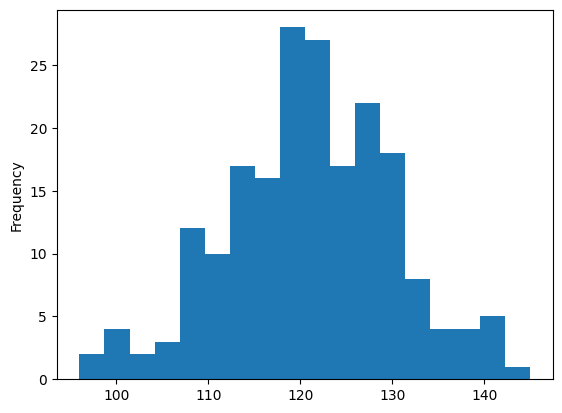

In [69]:
# До и после рекламы Компании 1
histogram = df['City1Bef'].plot.hist(bins=18)

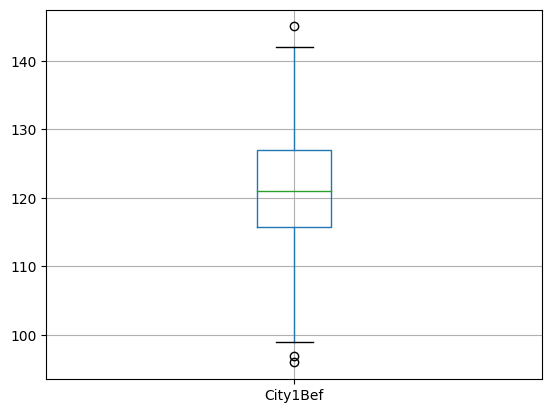

In [70]:
boxplot = df.boxplot(column=['City1Bef'])

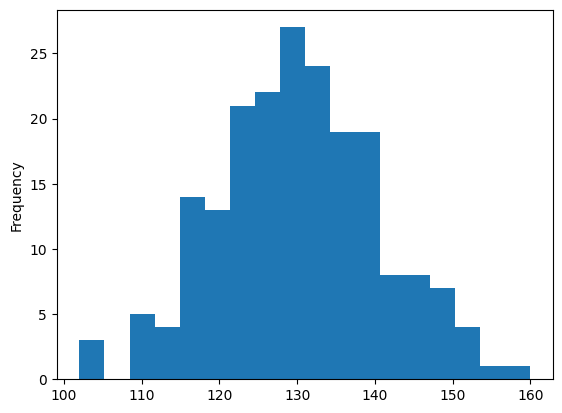

In [71]:
histogram = df['City1Aft'].plot.hist(bins=18)

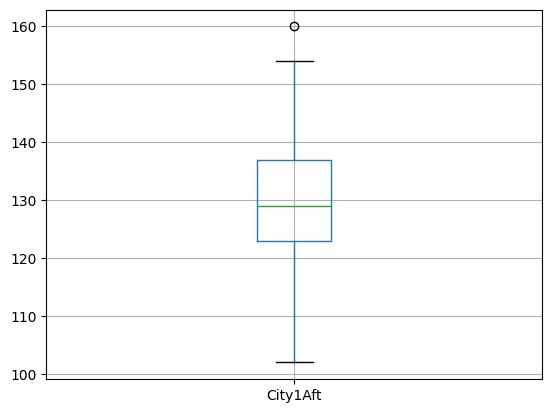

In [72]:
boxplot = df.boxplot(column=['City1Aft'])

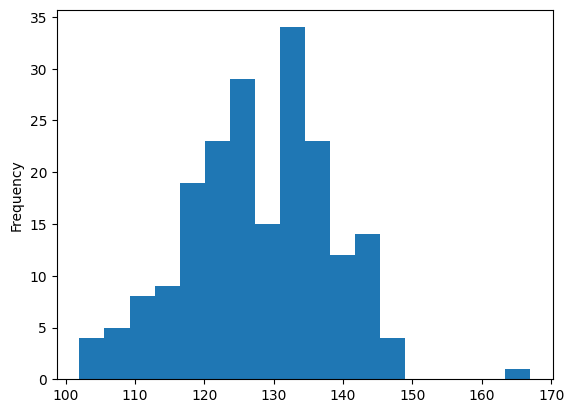

In [73]:
# До и после рекламы Компании 2
histogram = df['City2Bef'].plot.hist(bins=18)

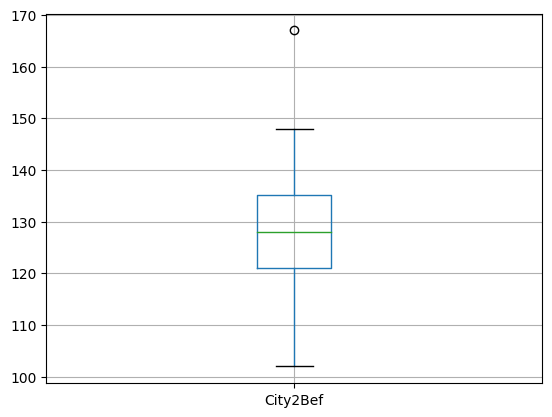

In [74]:
boxplot = df.boxplot(column=['City2Bef'])

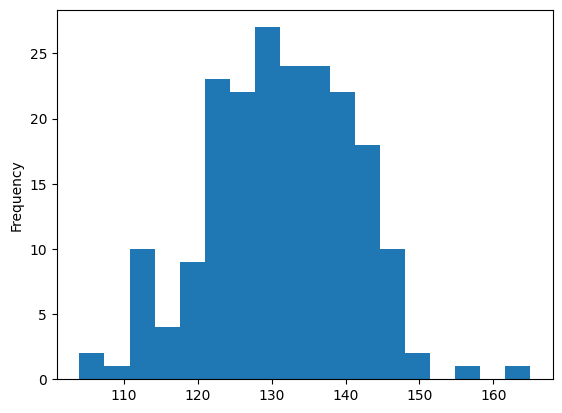

In [75]:
histogram = df['City2Aft'].plot.hist(bins=18)

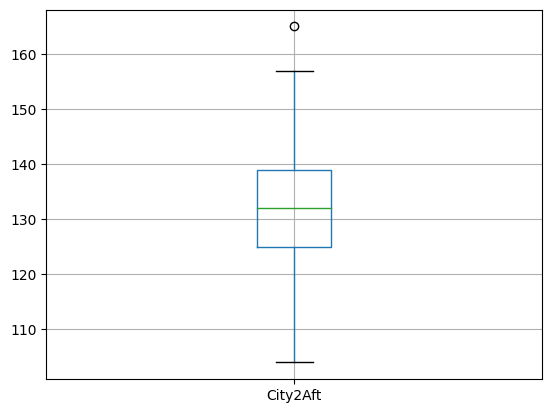

In [76]:
boxplot = df.boxplot(column=['City2Aft'])

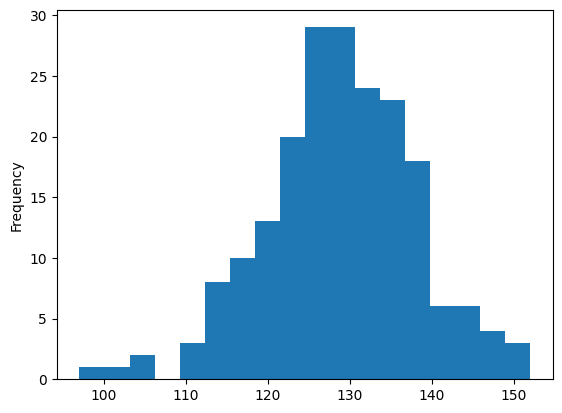

In [77]:
# До и после рекламы Компании 3
histogram = df['City3Bef'].plot.hist(bins=18)

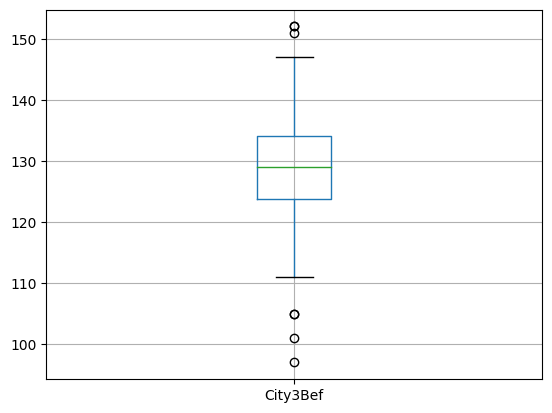

In [78]:
boxplot = df.boxplot(column=['City3Bef'])

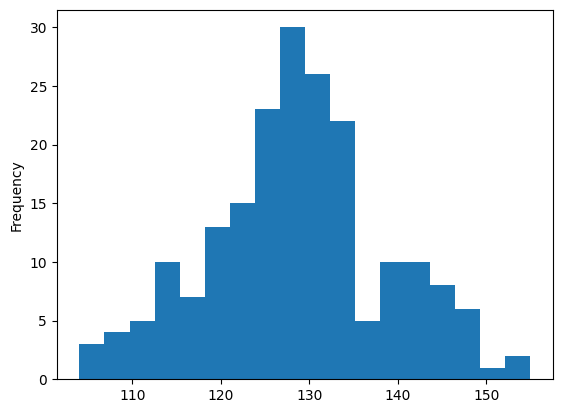

In [79]:
histogram = df['City3Aft'].plot.hist(bins=18)


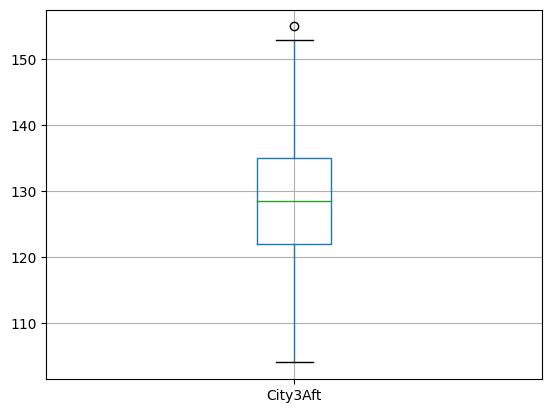

In [80]:
boxplot = df.boxplot(column=['City3Aft'])

In [81]:
# Извлечение данных для первого города до и после рекламной кампании
city1_bef = df['City1Bef']
city1_aft = df['City1Aft']

In [82]:
# Расчет описательных статистик для до и после рекламы
print('До рекламы, Среднее: ', np.mean(city1_bef))
print('До рекламы, Стандартное отклонение: ', np.std(city1_bef))
print('После рекламы, Среднее: ', np.mean(city1_aft))
print('После рекламы, Стандартное отклонение: ', np.std(city1_aft))

До рекламы, Среднее:  121.06
До рекламы, Стандартное отклонение:  9.07889861161584
После рекламы, Среднее:  129.965
После рекламы, Стандартное отклонение:  10.340878831124558


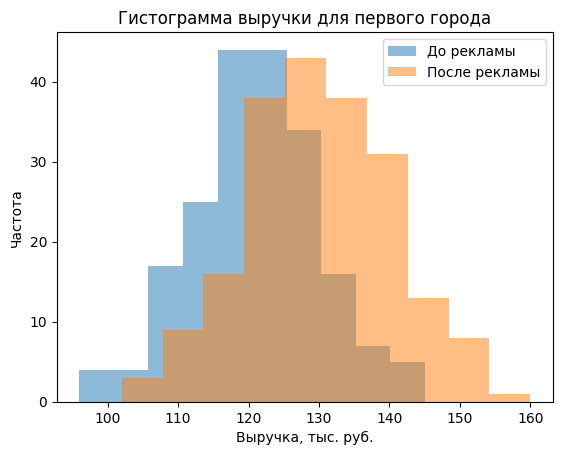

In [84]:
# Построение гистограммы
plt.hist(city1_bef, alpha=0.5, label='До рекламы')
plt.hist(city1_aft, alpha=0.5, label='После рекламы')
plt.legend(loc='upper right')
plt.title('Гистограмма выручки для первого города')
plt.xlabel('Выручка, тыс. руб.')
plt.ylabel('Частота')
plt.show()

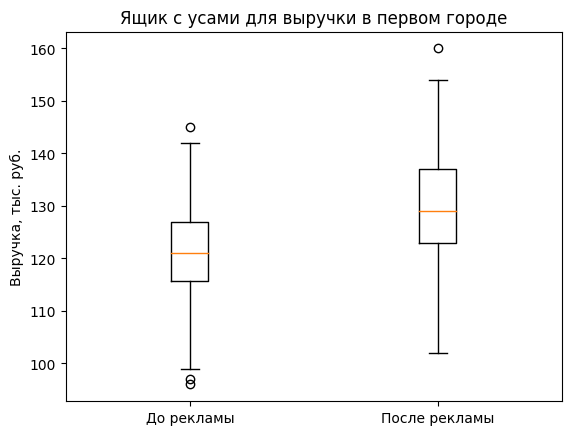

In [85]:
# Построение графика "ящик с усами"
plt.boxplot([city1_bef, city1_aft])
plt.title('Ящик с усами для выручки в первом городе')
plt.xticks([1, 2], ['До рекламы', 'После рекламы'])
plt.ylabel('Выручка, тыс. руб.')
plt.show()


In [86]:
# Формальная постановка задачи
# Необходимо проверить, была ли реклама эффективной в первом городе.
# Для этого нужно проверить, является ли разница в уровне продаж до и после рекламной акции статистически значимой.
# Для этого будем использовать парный t-тест, так как у нас есть две выборки, связанные между собой (до и после рекламы).
# Для применения t-теста необходимо, чтобы данные были нормально распределены и имели одинаковую дисперсию.
# Также данные должны быть связанными, то есть мы должны знать, какой киоск до и после рекламы.
# Для проверки нормальности распределения и одинаковости дисперсии будем использовать тест Шапиро-Уилка и тест Левена соответственно.

In [87]:
# Проверка нормальности распределения
stat_bef, p_bef = stats.shapiro(city1_bef)
stat_aft, p_aft = stats.shapiro(city1_aft)
print('Шапиро-Уилка для до рекламы: статистика = %.3f, p-value = %.3f' % (stat_bef, p_bef))
print('Шапиро-Уилка для после рекламы: статистика = %.3f, p-value = %.3f' % (stat_aft, p_aft))

Шапиро-Уилка для до рекламы: статистика = 0.995, p-value = 0.688
Шапиро-Уилка для после рекламы: статистика = 0.995, p-value = 0.815


In [88]:
# Проверка одинаковости дисперсии
stat, p = stats.levene(city1_bef, city1_aft)
print('Тест Левена: статистика = %.3f, p-value = %.3f' % (stat, p))

Тест Левена: статистика = 3.135, p-value = 0.077


In [89]:
# Проверка гипотезы о равенстве средней выручки до и после рекламной акции
stat, p = stats.ttest_rel(city1_bef, city1_aft)
print('t-тест: статистика = %.3f, p-value = %.3f' % (stat, p))

t-тест: статистика = -8.938, p-value = 0.000


In [90]:
# Вывод результатов
alpha = 0.05
if p < alpha:
    print('Реклама была эффективной в первом городе')
else:
    print('Реклама не была эффективной в первом городе')

Реклама была эффективной в первом городе


In [91]:
# Проверка нормальности данных во всех столбцах:
for column in df:
    shapiro_test = stats.shapiro(df[column])
    print(shapiro_test[1])

5.391695140133379e-06
0.6882737278938293
0.8150795102119446
0.10009992867708206
0.35079240798950195
0.12742337584495544
0.4744095206260681


In [92]:
# Проверка гипотезы о равенстве средней выручки до и после рекламной акции при уровне значимости 0.01
alpha = 0.01
stat, p = stats.ttest_rel(city1_bef, city1_aft)
if p < alpha:
    print('Результат статистически значимый на уровне 0.01, реклама была эффективной')
else:
    print('Нет статистической значимости на уровне 0.01, реклама не была эффективной')

Результат статистически значимый на уровне 0.01, реклама была эффективной
